In [34]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('sudeste_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [4]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


In [5]:
df[~df.isnull().any(axis=1)]

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
11,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 11:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 12:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 13:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14 09:00:00,2007-11-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14 22:00:00,2007-11-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-15 09:00:00,2007-11-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-15 22:00:00,2007-11-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-16 09:00:00,2007-11-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17 09:00:00,2007-11-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17 22:00:00,2007-11-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[df.isnull().any(axis=1)]

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
5,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 05:00:00,2007-11-06,...,25.4,16.4,23.8,16.0,62.0,62.0,57.0,2.0,99.0,6.8
6,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 06:00:00,2007-11-06,...,23.8,16.7,22.0,16.2,72.0,72.0,62.0,1.3,93.0,4.9
7,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 07:00:00,2007-11-06,...,22.0,17.8,19.5,16.6,86.0,89.0,72.0,0.5,157.0,2.8
8,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 08:00:00,2007-11-06,...,19.7,17.3,18.3,16.9,93.0,94.0,85.0,NaN,141.0,1.5
9,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 09:00:00,2007-11-06,...,22.9,18.3,18.2,17.1,75.0,94.0,75.0,NaN,248.0,NaN


In [7]:
data = df[['prcp', 'gust', 'tmax', 'dmax', 'dmin', 'hmdy', 'hmax', 'prov']]

In [8]:
data.groupby('prov').nunique()

,prcp,gust,tmax,dmax,dmin,hmdy,hmax,prov
prov,,,,,,,,
ES,232,234,363,314,319,91,92,1
MG,313,272,466,450,404,92,96,1
RJ,284,330,418,436,403,92,101,1
SP,295,251,453,459,424,92,96,1


In [9]:
data_RJ = data[data['prov'] == 'RJ'].drop(columns=['prov'])

In [10]:
aux = data_RJ[~data_RJ.isna().any(axis=1)]
valid_data = aux[aux > 0.0].dropna()
del aux

In [11]:
valid_data.head()

,prcp,gust,tmax,dmax,dmin,hmdy,hmax
1725,0.6,13.3,31.0,24.6,20.4,77.0,80.0
1979,0.2,1.8,24.2,22.7,22.1,90.0,94.0
1986,0.2,3.9,29.0,23.9,21.7,78.0,79.0
2084,2.0,8.2,26.0,23.8,23.2,91.0,91.0
2579,0.2,2.5,25.9,22.6,21.3,80.0,88.0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(valid_data[valid_data.columns[1:]], valid_data[valid_data.columns[0]], train_size=0.01, random_state=42)

C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


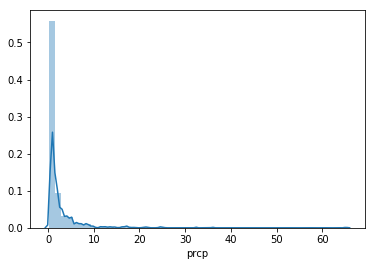

In [135]:
sns.distplot(y_train)

In [136]:
y_train = y_train > 5
y_test = y_test > 5

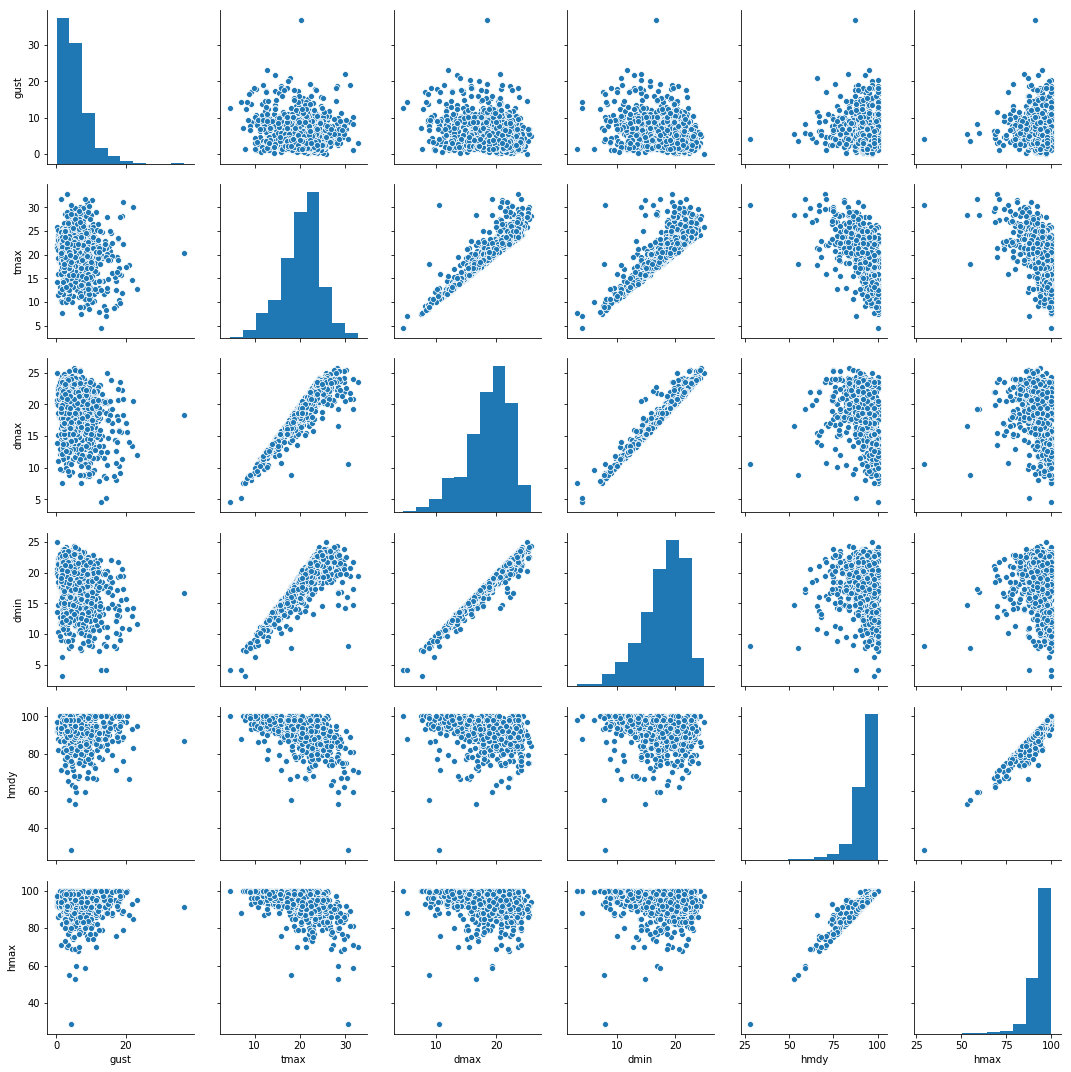

In [137]:
sns.pairplot(X_train)
plt.show()

In [138]:
pca = PCA(.8)
standardScaler = StandardScaler()
standardScaler.fit(X_train)
pca.fit(standardScaler.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [139]:
svc = SVC()
%time svc.fit(apca.transform(standardScaler.transform(X_train)), y_train)

Wall time: 25.1 ms


C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [140]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_train)))

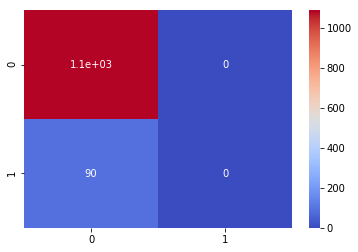

In [141]:
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

In [142]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_test)))

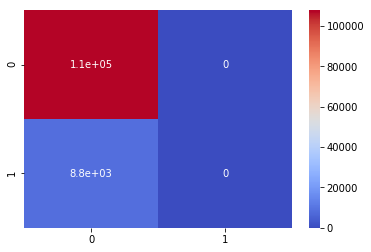

In [143]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)

In [144]:
transformed_X_train = pca.transform(standardScaler.transform(X_train))

In [145]:
# p_cs = 2. ** np.arange(-5,12)
# p_gammas = 2. ** np.arange(-13,2)
# # p_epsilon = 1. ** np.arange(-5,5)
# model_cv=GridSearchCV(SVC(kernel='rbf'),{'C':p_cs,'gamma':p_gammas},cv=10,verbose=True, n_jobs=3)
# model_cv.fit(transformed_X_train, y_train)

In [146]:
# model_cv.best_params_

In [147]:
# y_pred = model_cv.predict(pca.transform(standardScaler.transform(X_train)))

In [148]:
# sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

In [151]:
svc = SVC(class_weight='balanced')
%time svc.fit(pca.transform(standardScaler.transform(X_train)), y_train)

Wall time: 34.9 ms


C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

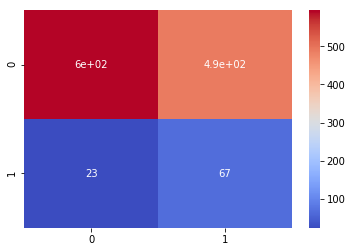

In [153]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_train)))
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

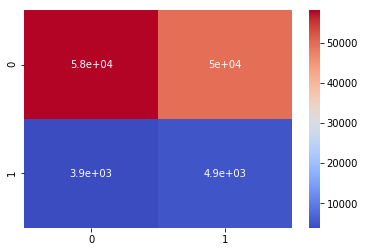

In [154]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_test)))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)

In [156]:
p_cs = 2. ** np.arange(-5,12)
p_gammas = 2. ** np.arange(-13,2)
p_class_weight= ['balanced']
# p_epsilon = 1. ** np.arange(-5,5)
model_cv=GridSearchCV(SVC(kernel='rbf'),{'C':p_cs,'gamma':p_gammas, 'class_weight': p_class_weight},cv=10,verbose=True, n_jobs=3)
model_cv.fit(transformed_X_train, y_train)

Fitting 10 folds for each of 255 candidates, totalling 2550 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  89 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done 689 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done 1689 tasks      | elapsed:   34.8s
[Parallel(n_jobs=3)]: Done 2550 out of 2550 | elapsed:  1.3min finished
C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 6.400e+01,
       1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03]), 'gamma': array([1.22070e-04, 2.44141e-04, 4.88281e-04, 9.76562e-04, 1.95312e-03,
       3.90625e-03, 7.81250e-03, 1.56250e-02, 3.12500e-02, 6.25000e-02,
       1.25000e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00, 2.00000e+00]), 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

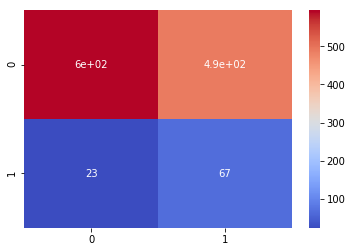

In [157]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_train)))
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

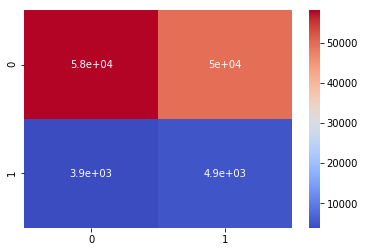

In [158]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_test)))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)

In [161]:
y_train[y_train].shape

(90,)

In [167]:
false = np.random.choice(y_train[~y_train].index, size = y_train[y_train].shape[0])

In [185]:
y_train_sub = pd.Series(np.hstack((y_train[y_train], y_train.loc[false])), index=np.hstack((y_train[y_train].index, y_train.loc[false].index)))

In [186]:
y_train_sub

6063535     True
6833837     True
6977029     True
6469165     True
6694423     True
6987414     True
6497695     True
6103692     True
6153203     True
6302887     True
6189677     True
5804520     True
6195457     True
6362620     True
6388599     True
6258341     True
6554892     True
5809549     True
6369207     True
6288990     True
5932444     True
6362295     True
6614719     True
6851980     True
6310618     True
6560002     True
6093059     True
6163968     True
5950688     True
6240878     True
           ...  
6002364    False
6832954    False
5728804    False
5805159    False
6356085    False
6076595    False
6906367    False
6929165    False
6591846    False
6424097    False
6390616    False
6736960    False
6531704    False
5762533    False
5847318    False
6341707    False
6673632    False
5610657    False
6889954    False
6597792    False
6507750    False
5631776    False
5720562    False
6863387    False
5586372    False
6355479    False
6577492    False
6572515    Fal

In [200]:
pca = PCA(.8)
standardScaler = StandardScaler()
standardScaler.fit(X_train)
pca.fit(standardScaler.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [201]:
svc = SVC()
%time svc.fit(pca.transform(standardScaler.transform(X_train.loc[y_train_sub.index])), y_train.loc[y_train_sub.index])

Wall time: 4.99 ms


C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

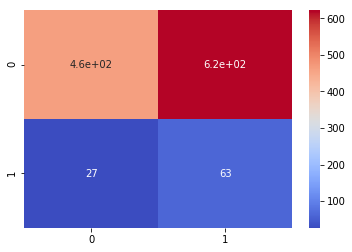

In [202]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_train)))
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

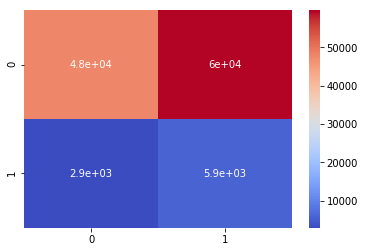

In [203]:
y_pred = svc.predict(pca.transform(standardScaler.transform(X_test)))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)

In [194]:
p_cs = 2. ** np.arange(-5,12)
p_gammas = 2. ** np.arange(-13,2)
# p_epsilon = 1. ** np.arange(-5,5)
model_cv=GridSearchCV(SVC(kernel='rbf'),{'C':p_cs,'gamma':p_gammas},cv=10,verbose=True, n_jobs=3)
model_cv.fit(pca.transform(standardScaler.transform(X_train.loc[y_train_sub.index])), y_train.loc[y_train_sub.index])

Fitting 10 folds for each of 255 candidates, totalling 2550 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 2550 out of 2550 | elapsed:    6.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 6.400e+01,
       1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03]), 'gamma': array([1.22070e-04, 2.44141e-04, 4.88281e-04, 9.76562e-04, 1.95312e-03,
       3.90625e-03, 7.81250e-03, 1.56250e-02, 3.12500e-02, 6.25000e-02,
       1.25000e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00, 2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

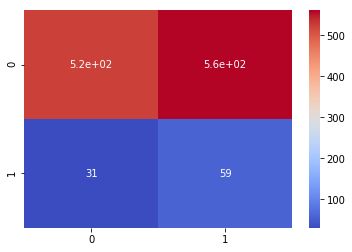

In [197]:
y_pred = model_cv.predict(pca.transform(standardScaler.transform(X_train)))
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

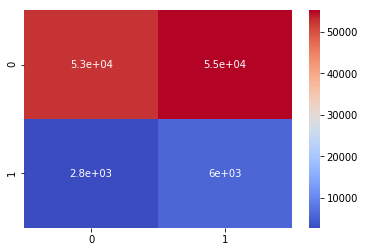

In [198]:
y_pred = model_cv.predict(pca.transform(standardScaler.transform(X_test)))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)

In [204]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(pca.transform(standardScaler.transform(X_train)), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

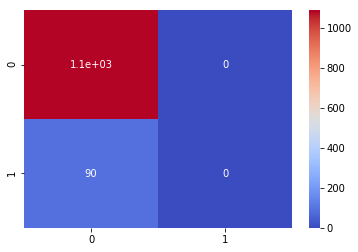

In [206]:
y_pred = gnb.predict(pca.transform(standardScaler.transform(X_train)))
sns.heatmap(confusion_matrix(y_train, y_pred), cmap='coolwarm', annot=True)

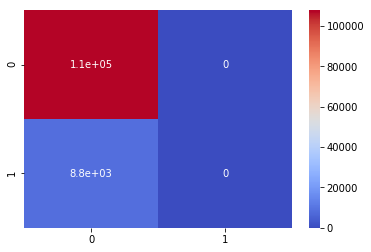

In [207]:
y_pred = gnb.predict(pca.transform(standardScaler.transform(X_test)))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)